In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
#Importing the dataset
df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

/tmp/ipykernel_39979/2134542247.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")


In [5]:
df.head()

Unique Key            Created Date             Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01/01/2016 12:55:15 AM   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01/01/2016 01:26:57 AM   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01/01/2016 04:51:03 AM   NYPD   
3    32305098  12/31/2015 11:57:46 PM  01/01/2016 07:43:13 AM   NYPD   
4    32306529  12/31/2015 11:56:58 PM  01/01/2016 03:24:42 AM   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Street/Sidewalk       10458.0   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0   
4              Blocked Sidewalk  Street/Sidewalk       11373.0   

        Incident Address  ... Bridge Highway Name Bridge Highway Direction  \
0    71 VERMILYEA AVENUE  ...                 NaN                      NaN   
1        27-07 23 AVENUE  ...                 NaN                      NaN   
2  2897 VALENTINE AVENUE  ...                 NaN                      NaN   
3    2940 BAISLEY AVENUE  ...                 NaN                      NaN   
4          87-14 57 ROAD  ...                 NaN                      NaN   

  Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction  \
0       NaN                    NaN             NaN             NaN   
1       NaN                    NaN             NaN             NaN   
2       NaN                    NaN             NaN             NaN   
3       NaN                    NaN             NaN             NaN   
4       NaN                    NaN             NaN             NaN   

  Ferry Terminal Name   Latitude  Longitude  \
0                 NaN  40.865682 -73.923501   
1                 NaN  40.775945 -73.915094   
2                 NaN  40.870325 -73.888525   
3                 NaN  40.835994 -73.828379   
4                 NaN  40.733060 -73.874170   

                                   Location  
0   (40.86568153633767, -73.92350095571744)  
1  (40.775945312321085, -73.91509393898605)  
2  (40.870324522111424, -73.88852464418646)  
3   (40.83599404683083, -73.82837939584206)  
4  (40.733059618956815, -73.87416975810375)  

[5 rows x 53 columns]

In [7]:
#Understanding the data
df.describe()

Unique Key   Incident Zip  X Coordinate (State Plane)  \
count  3.645580e+05  361560.000000                3.605280e+05   
mean   3.106595e+07   10858.496659                1.005043e+06   
std    7.331531e+05     578.263114                2.196362e+04   
min    2.960737e+07      83.000000                9.133570e+05   
25%    3.049938e+07   10314.000000                9.919460e+05   
50%    3.108795e+07   11209.000000                1.003470e+06   
75%    3.167433e+07   11238.000000                1.019134e+06   
max    3.231065e+07   11697.000000                1.067186e+06   

       Y Coordinate (State Plane)  School or Citywide Complaint  Vehicle Type  \
count               360528.000000                           0.0           0.0   
mean                203425.305782                           NaN           NaN   
std                  29842.192857                           NaN           NaN   
min                 121185.000000                           NaN           NaN   
25%                 182945.000000                           NaN           NaN   
50%                 201023.000000                           NaN           NaN   
75%                 222790.000000                           NaN           NaN   
max                 271876.000000                           NaN           NaN   

       Taxi Company Borough  Taxi Pick Up Location  Garage Lot Name  \
count                   0.0                    0.0              0.0   
mean                    NaN                    NaN              NaN   
std                     NaN                    NaN              NaN   
min                     NaN                    NaN              NaN   
25%                     NaN                    NaN              NaN   
50%                     NaN                    NaN              NaN   
75%                     NaN                    NaN              NaN   
max                     NaN                    NaN              NaN   

            Latitude      Longitude  
count  360528.000000  360528.000000  
mean       40.724980     -73.924946  
std         0.081907       0.079213  
min        40.499040     -74.254937  
25%        40.668742     -73.972253  
50%        40.718406     -73.930643  
75%        40.778166     -73.874098  
max        40.912869     -73.700715

In [8]:
df.shape

(364558, 53)

In [10]:
#Conversion to datetime format
df["Created Date"]=pd.to_datetime(df["Created Date"])
df["Closed Date"]=pd.to_datetime(df["Closed Date"])

In [12]:
#Creating a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing
df["Request_Closing_Time"]=(df["Closed Date"]-df["Created Date"])
Request_Closing_Time=[]
for x in (df["Closed Date"]-df["Created Date"]):
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
df["Request_Closing_Time"]=Request_Closing_Time

In [13]:
df.head()

Unique Key        Created Date         Closed Date Agency  \
0    32310363 2015-12-31 23:59:45 2016-01-01 00:55:15   NYPD   
1    32309934 2015-12-31 23:59:44 2016-01-01 01:26:57   NYPD   
2    32309159 2015-12-31 23:59:29 2016-01-01 04:51:03   NYPD   
3    32305098 2015-12-31 23:57:46 2016-01-01 07:43:13   NYPD   
4    32306529 2015-12-31 23:56:58 2016-01-01 03:24:42   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Street/Sidewalk       10458.0   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0   
4              Blocked Sidewalk  Street/Sidewalk       11373.0   

        Incident Address  ... Bridge Highway Direction Road Ramp  \
0    71 VERMILYEA AVENUE  ...                      NaN       NaN   
1        27-07 23 AVENUE  ...                      NaN       NaN   
2  2897 VALENTINE AVENUE  ...                      NaN       NaN   
3    2940 BAISLEY AVENUE  ...                      NaN       NaN   
4          87-14 57 ROAD  ...                      NaN       NaN   

  Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name  \
0                    NaN             NaN             NaN                 NaN   
1                    NaN             NaN             NaN                 NaN   
2                    NaN             NaN             NaN                 NaN   
3                    NaN             NaN             NaN                 NaN   
4                    NaN             NaN             NaN                 NaN   

    Latitude  Longitude                                  Location  \
0  40.865682 -73.923501   (40.86568153633767, -73.92350095571744)   
1  40.775945 -73.915094  (40.775945312321085, -73.91509393898605)   
2  40.870325 -73.888525  (40.870324522111424, -73.88852464418646)   
3  40.835994 -73.828379   (40.83599404683083, -73.82837939584206)   
4  40.733060 -73.874170  (40.733059618956815, -73.87416975810375)   

  Request_Closing_Time  
0            55.500000  
1            87.216667  
2           291.566667  
3           465.450000  
4           207.733333  

[5 rows x 54 columns]

In [15]:
#EDA
df["Agency"].unique()

array(['NYPD'], dtype=object)

We can see the above data belongs to the NYPD.

/home/nemesis/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

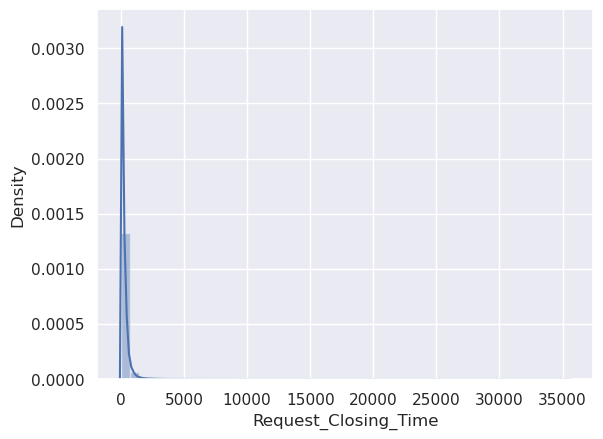

In [16]:
sns.distplot(df["Request_Closing_Time"])
plt.show

In [18]:
print("Total Number of Complaints : ",len(df),"\n")
print("Percentage of complaints that took 99 hours or less : ",round((len(df)-(df["Request_Closing_Time"]>=99).sum())/len(df)*100,2),"%")
print("Percentage of complaints that took 999 hours or less : ",round((len(df)-(df["Request_Closing_Time"]>=999).sum())/len(df)*100,2),"%")

Total Number of Complaints :  364558 

Percentage of complaints that took 99 hours or less :  33.32 %
Percentage of complaints that took 999 hours or less :  97.43 %


From the above data we can see that majority of the complaints needed more than 99 hours to be dealt with.

/home/nemesis/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


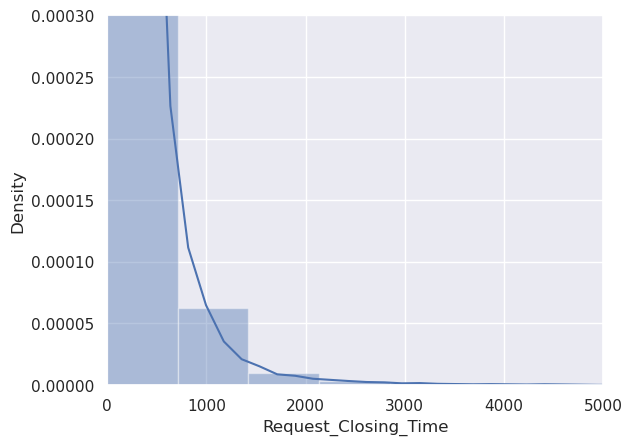

In [20]:
sns.distplot(df["Request_Closing_Time"])
plt.xlim((0,5000))
plt.ylim((0,0.0003))
plt.show()

Now let us try to understand the major complaint types

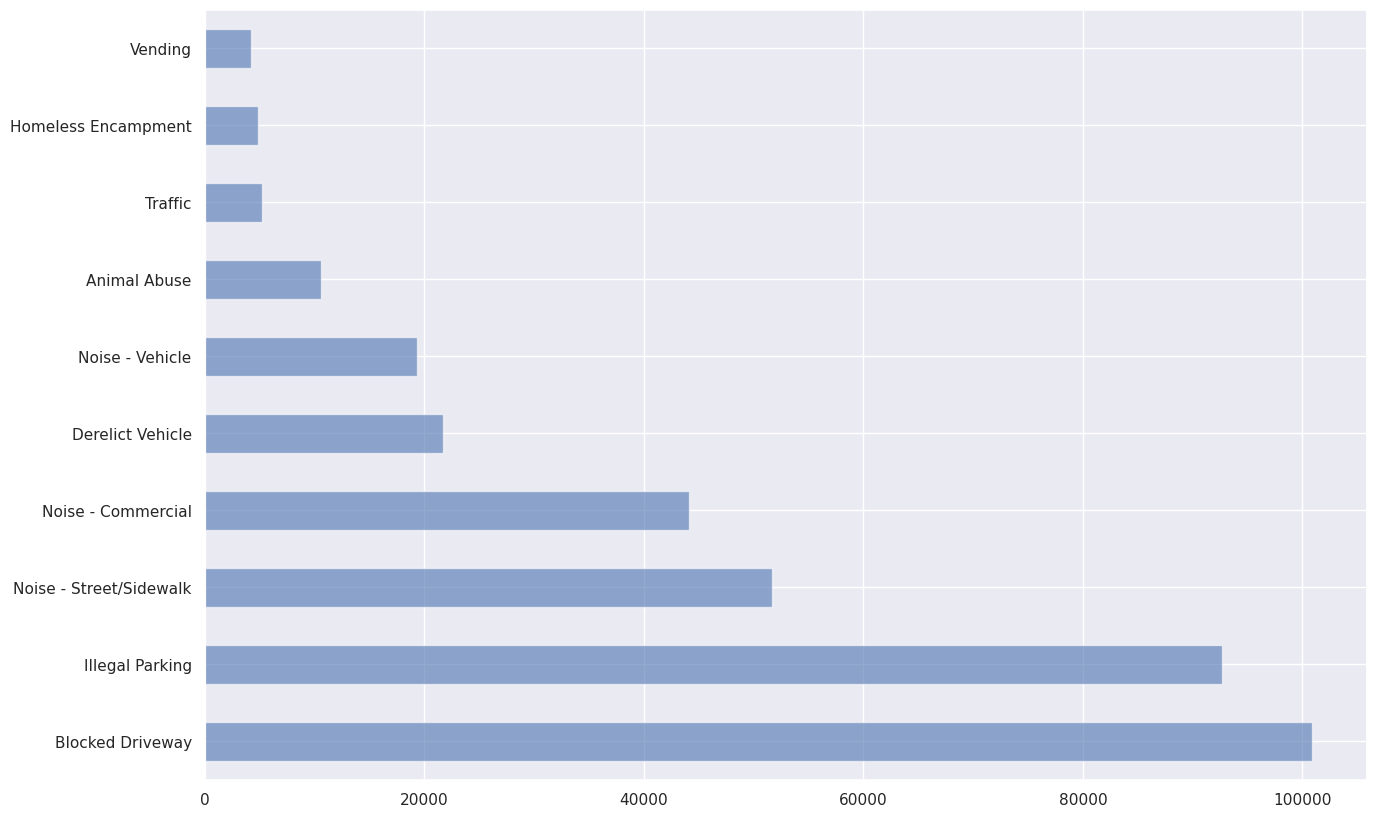

In [21]:
df['Complaint Type'].value_counts()[:10].plot(kind='barh',alpha=0.6,figsize=(15,10))
plt.show()

From the above graph we can see that majority of complaints are related to that of transporttion and parking and as such it needed more time to be resolved.

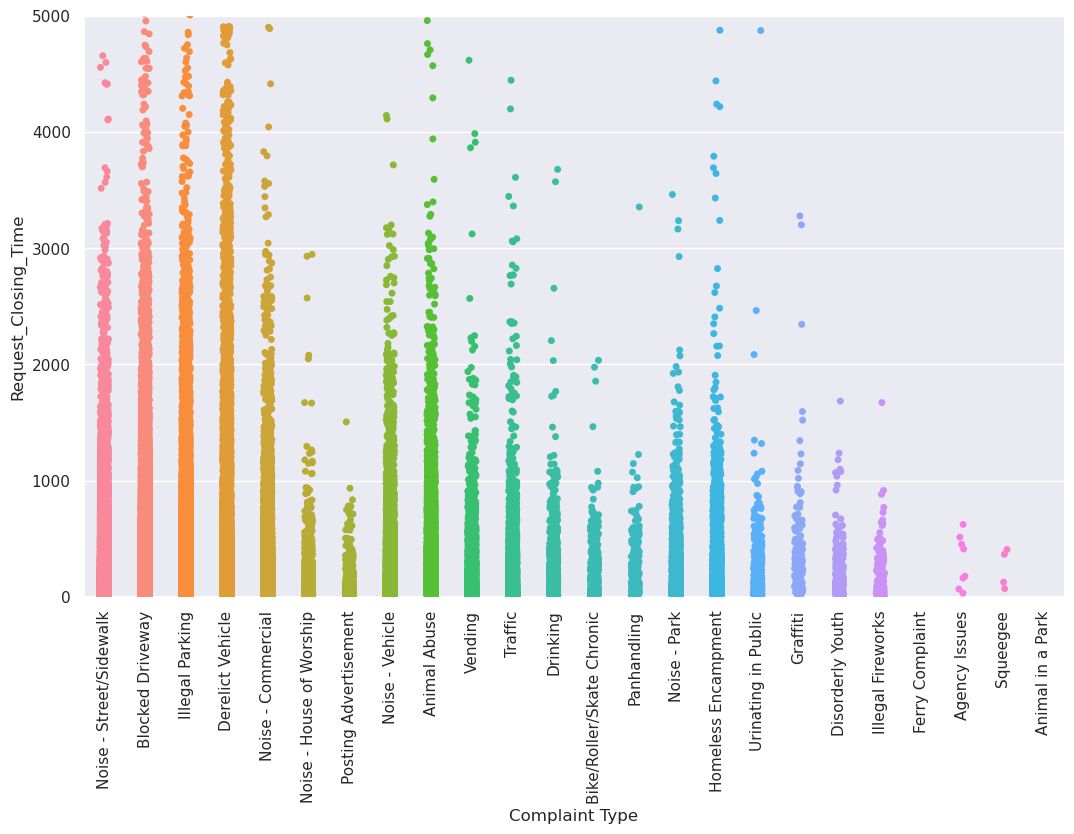

In [24]:
crt = sns.catplot(x='Complaint Type', y="Request_Closing_Time",data=df)
crt.fig.set_figwidth(15)
crt.fig.set_figheight(7)
plt.xticks(rotation=90)
plt.ylim((0,5000))
plt.show()

We can see from the above lot that major complaints arises from transport and take up huge time to be resolved and as such the government should take steps to improve the transport system and implement stricter vehicle laws.

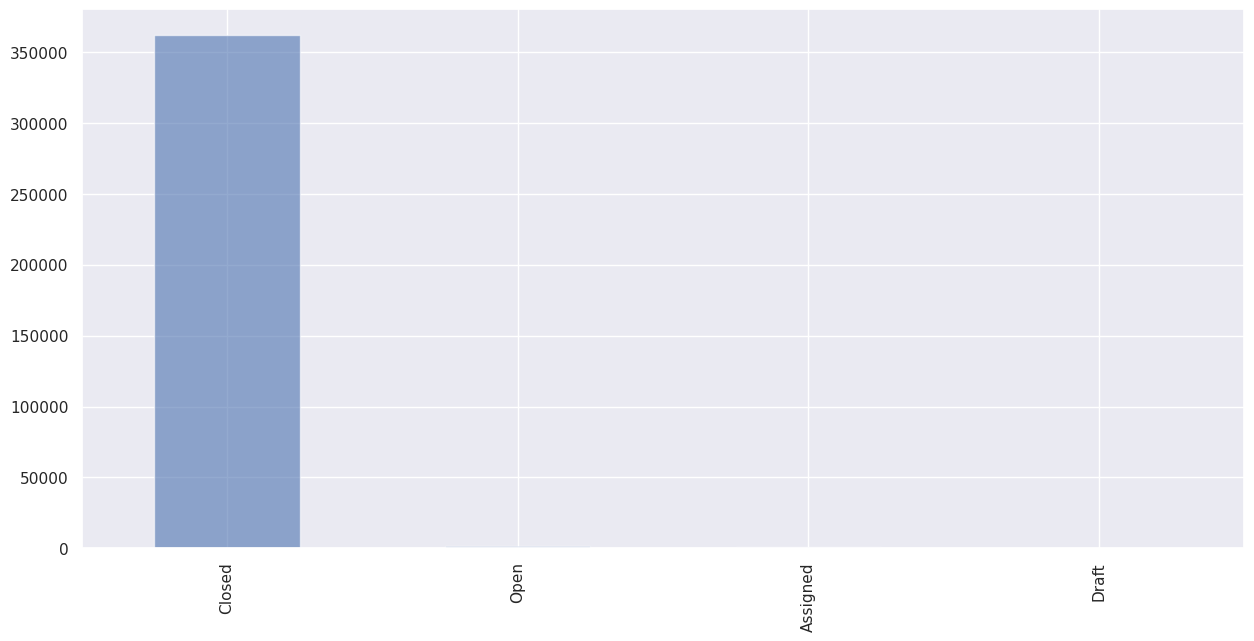

In [26]:
df['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(15,7))
plt.show()

From the above plot we can see all complaints are now closed that is they are resolved.

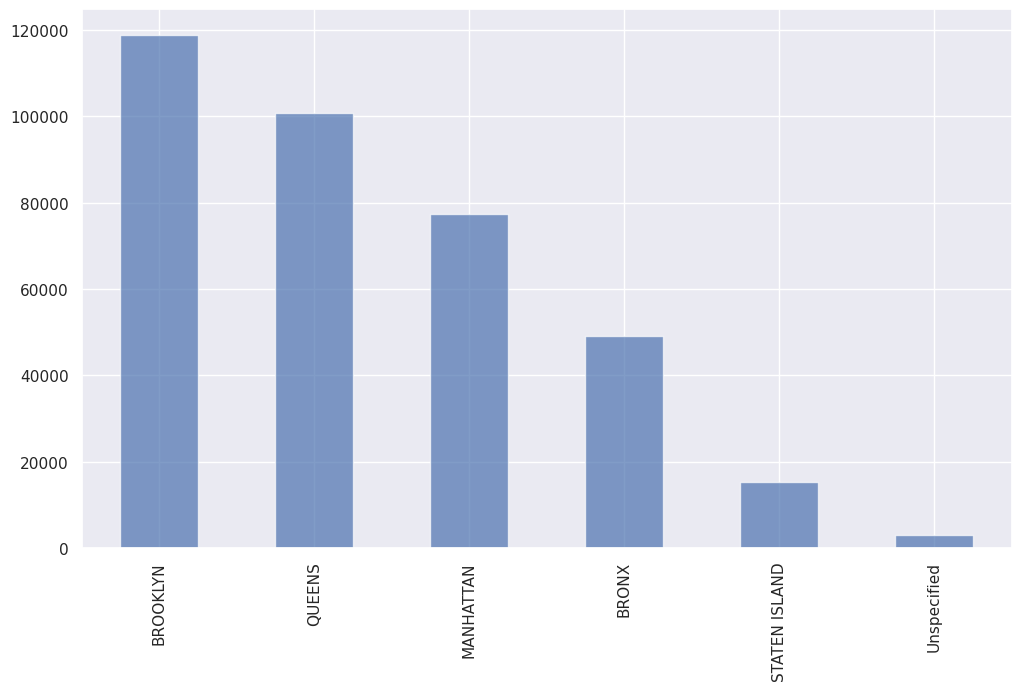

In [27]:
plt.figure(figsize=(12,7))
df['Borough'].value_counts().plot(kind='bar',alpha=0.7)
plt.show()

In [29]:
for x in df["Borough"].unique():
    print("Percentage of complaints from ",x," : ",round((df["Borough"]==x).sum()/len(df)*100,2))

Percentage of complaints from  MANHATTAN  :  21.25
Percentage of complaints from  QUEENS  :  27.64
Percentage of complaints from  BRONX  :  13.49
Percentage of complaints from  BROOKLYN  :  32.6
Percentage of complaints from  Unspecified  :  0.81
Percentage of complaints from  STATEN ISLAND  :  4.21


In [30]:
#All unique locations
df["Location Type"].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', 'Terminal', nan,
       'Ferry', 'Park'], dtype=object)

In [31]:
pd.DataFrame(df.groupby("Location Type")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")

Request_Closing_Time
Location Type                                   
Subway Station                        145.120000
Club/Bar/Restaurant                   183.492218
House of Worship                      190.052861
Store/Commercial                      192.928792
Highway                               204.372348
Park/Playground                       206.594724
Bridge                                229.458333
Street/Sidewalk                       261.052945
Residential Building                  267.260350
Commercial                            270.649846
Roadway Tunnel                        283.486047
House and Store                       291.750204
Parking Lot                           296.526747
Residential Building/House            300.233145
Vacant Lot                            404.561930
Park                                20210.566667
Ferry                                        NaN
Terminal                                     NaN

Conclusion : Maximum time taken to resolved a complaint is in park and vacant lots whereas complaints from subway or club/bar/restaurant take the lowest.

In [32]:
#losing time of complaints with respect to city
pd.DataFrame(df.groupby("City")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")

Request_Closing_Time
City                                     
ARVERNE                        137.840605
ROCKAWAY PARK                  139.602908
LITTLE NECK                    155.031437
OAKLAND GARDENS                156.240167
BAYSIDE                        160.062978
FAR ROCKAWAY                   161.193068
NEW YORK                       175.343723
FLUSHING                       177.446478
FOREST HILLS                   184.097636
WHITESTONE                     187.976467
CORONA                         188.984584
COLLEGE POINT                  190.393782
JACKSON HEIGHTS                190.885368
ELMHURST                       194.108392
FRESH MEADOWS                  200.741045
REGO PARK                      202.462138
BREEZY POINT                   205.197849
EAST ELMHURST                  206.801481
CENTRAL PARK                   206.921364
STATEN ISLAND                  228.038305
BROOKLYN                       236.607935
Howard Beach                   241.750000
Astoria                        242.452302
Long Island City               245.388922
ASTORIA                        265.236501
RIDGEWOOD                      268.285547
SAINT ALBANS                   271.040767
East Elmhurst                  273.630556
Woodside                       281.455622
KEW GARDENS                    283.319775
JAMAICA                        305.346459
SOUTH OZONE PARK               308.283046
SOUTH RICHMOND HILL            318.020470
WOODHAVEN                      321.714469
RICHMOND HILL                  321.749064
MIDDLE VILLAGE                 323.290492
OZONE PARK                     328.309146
MASPETH                        328.997706
HOLLIS                         332.061427
HOWARD BEACH                   346.959615
BRONX                          353.116425
LONG ISLAND CITY               367.326726
SUNNYSIDE                      380.744297
WOODSIDE                       389.758733
NEW HYDE PARK                  423.396512
GLEN OAKS                      501.653463
SPRINGFIELD GARDENS            510.113239
CAMBRIA HEIGHTS                542.883117
ROSEDALE                       569.194745
BELLEROSE                      576.173614
QUEENS VILLAGE                 593.920472
FLORAL PARK                    609.812160
QUEENS                         717.171171

In [33]:
#Percentage of missing values
pd.DataFrame((df.isnull().sum()/df.shape[0]*100)).sort_values(0,ascending=False)[:20]

0
School or Citywide Complaint  100.000000
Garage Lot Name               100.000000
Vehicle Type                  100.000000
Taxi Pick Up Location         100.000000
Taxi Company Borough          100.000000
Ferry Direction                99.999726
Ferry Terminal Name            99.999451
Road Ramp                      99.928132
Bridge Highway Segment         99.928132
Bridge Highway Direction       99.918531
Bridge Highway Name            99.918531
Landmark                       99.897136
Intersection Street 2          86.144317
Intersection Street 1          85.977540
Cross Street 2                 15.856187
Cross Street 1                 15.686941
Street Name                    14.181283
Incident Address               14.181283
Descriptor                      1.783255
Latitude                        1.105448

We can see that school or city wide complaint, garage lot name, vehicle type, taxi pickup location, taxi company borough have 100% missing values, that could mean there are no complaints from those sectors.

In [37]:
#We will now drop the missing values
dfn=df.loc[:,(df.isnull().sum()/df.shape[0]*100)<=50]

In [38]:
print("Old df shape :",df.shape)
print("New df shape: ",dfn.shape)

Old df shape : (364558, 54)
New df shape:  (364558, 40)


In [39]:
rem=[]
for x in new_df.columns.tolist():
    if new_df[x].nunique()<=3:
        print(x+ " "*10+" : ",new_df[x].unique())
        rem.append(x)

Agency           :  ['NYPD']
Agency Name           :  ['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']
Facility Type           :  ['Precinct' nan]
Park Facility Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Number           :  ['Unspecified' 'Q001']
School Region           :  ['Unspecified' nan]
School Code           :  ['Unspecified' nan]
School Phone Number           :  ['Unspecified' '7182176034']
School Address           :  ['Unspecified' 'Grand Central Parkway, near the soccer field']
School City           :  ['Unspecified' 'QUEENS']
School State           :  ['Unspecified' 'NY']
School Zip           :  ['Unspecified' nan]
School Not Found           :  ['N']


We can remove the unspecified data

In [40]:
dfn.drop(rem,axis=1,inplace=True)

/tmp/ipykernel_39979/3503437274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn.drop(rem,axis=1,inplace=True)


In [41]:
dfn.shape

(364558, 26)

In [42]:
dfn.head()

Unique Key        Created Date         Closed Date  \
0    32310363 2015-12-31 23:59:45 2016-01-01 00:55:15   
1    32309934 2015-12-31 23:59:44 2016-01-01 01:26:57   
2    32309159 2015-12-31 23:59:29 2016-01-01 04:51:03   
3    32305098 2015-12-31 23:57:46 2016-01-01 07:43:13   
4    32306529 2015-12-31 23:56:58 2016-01-01 03:24:42   

            Complaint Type                    Descriptor    Location Type  \
0  Noise - Street/Sidewalk              Loud Music/Party  Street/Sidewalk   
1         Blocked Driveway                     No Access  Street/Sidewalk   
2         Blocked Driveway                     No Access  Street/Sidewalk   
3          Illegal Parking  Commercial Overnight Parking  Street/Sidewalk   
4          Illegal Parking              Blocked Sidewalk  Street/Sidewalk   

   Incident Zip       Incident Address       Street Name   Cross Street 1  \
0       10034.0    71 VERMILYEA AVENUE  VERMILYEA AVENUE   ACADEMY STREET   
1       11105.0        27-07 23 AVENUE         23 AVENUE        27 STREET   
2       10458.0  2897 VALENTINE AVENUE  VALENTINE AVENUE  EAST 198 STREET   
3       10461.0    2940 BAISLEY AVENUE    BAISLEY AVENUE    EDISON AVENUE   
4       11373.0          87-14 57 ROAD           57 ROAD   SEABURY STREET   

   ... Resolution Action Updated Date Community Board    Borough  \
0  ...         01/01/2016 12:55:15 AM    12 MANHATTAN  MANHATTAN   
1  ...         01/01/2016 01:26:57 AM       01 QUEENS     QUEENS   
2  ...         01/01/2016 04:51:03 AM        07 BRONX      BRONX   
3  ...         01/01/2016 07:43:13 AM        10 BRONX      BRONX   
4  ...         01/01/2016 03:24:42 AM       04 QUEENS     QUEENS   

  X Coordinate (State Plane) Y Coordinate (State Plane) Park Borough  \
0                  1005409.0                   254678.0    MANHATTAN   
1                  1007766.0                   221986.0       QUEENS   
2                  1015081.0                   256380.0        BRONX   
3                  1031740.0                   243899.0        BRONX   
4                  1019123.0                   206375.0       QUEENS   

    Latitude  Longitude                                  Location  \
0  40.865682 -73.923501   (40.86568153633767, -73.92350095571744)   
1  40.775945 -73.915094  (40.775945312321085, -73.91509393898605)   
2  40.870325 -73.888525  (40.870324522111424, -73.88852464418646)   
3  40.835994 -73.828379   (40.83599404683083, -73.82837939584206)   
4  40.733060 -73.874170  (40.733059618956815, -73.87416975810375)   

   Request_Closing_Time  
0             55.500000  
1             87.216667  
2            291.566667  
3            465.450000  
4            207.733333  

[5 rows x 26 columns]

(0.0, 2000.0)

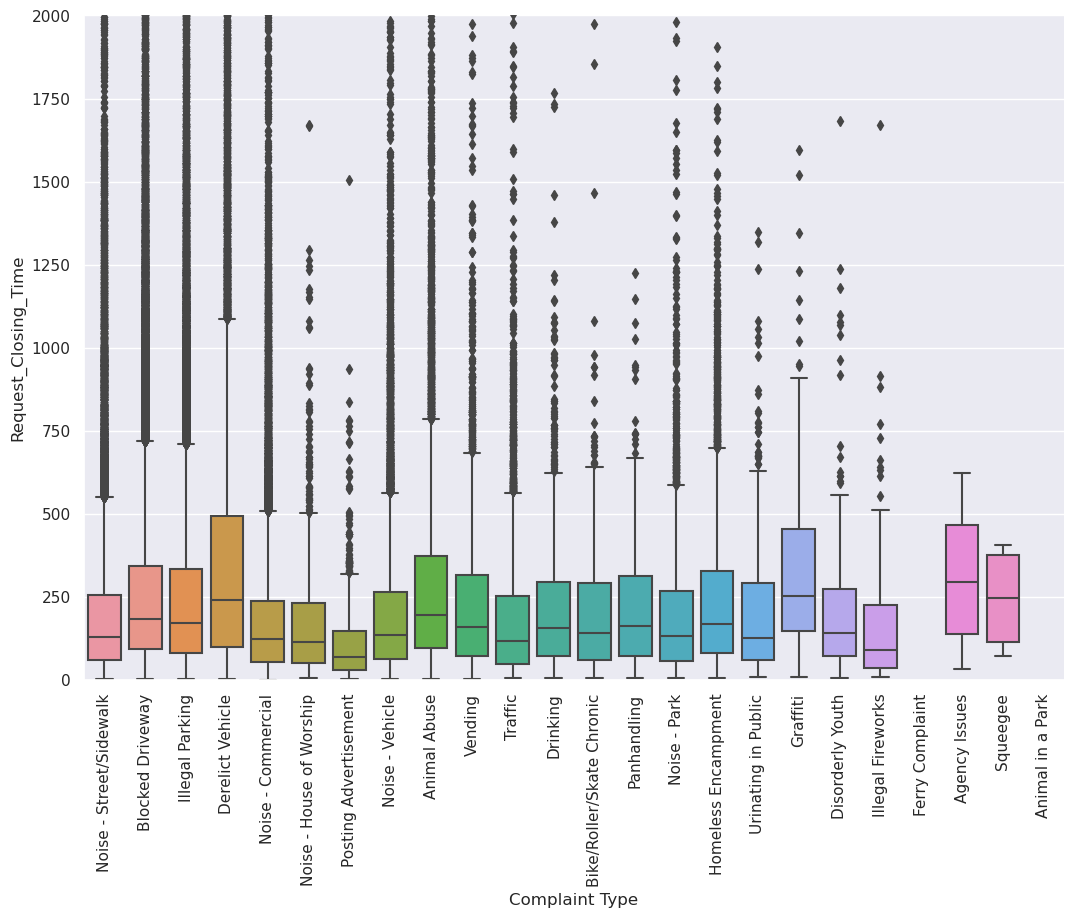

In [43]:
#Hypothesis testing
crt=sns.catplot(x="Complaint Type",y="Request_Closing_Time",kind="box",data=new_df)
crt.fig.set_figheight(8)
crt.fig.set_figwidth(15)
plt.xticks(rotation=90)
plt.ylim((0,2000))

H0: There is no significant different in mean of Request_Closing_Time for different Complaint


H1: There is signficant different in mean of Request_Closing_Time for different Complaint

In [44]:
anova_df=pd.DataFrame()
anova_df["Request_Closing_Time"]=new_df["Request_Closing_Time"]
anova_df["Complaint"]=new_df["Complaint Type"]

anova_df.dropna(inplace=True)
anova_df.head()

Request_Closing_Time                Complaint
0             55.500000  Noise - Street/Sidewalk
1             87.216667         Blocked Driveway
2            291.566667         Blocked Driveway
3            465.450000          Illegal Parking
4            207.733333          Illegal Parking

In [45]:
lm=ols("Request_Closing_Time~Complaint",data=anova_df).fit()
table=sm.stats.anova_lm(lm)
table

df        sum_sq       mean_sq          F  PR(>F)
Complaint      22.0  1.487316e+09  6.760526e+07  565.26157     0.0
Residual   362154.0  4.331361e+10  1.196000e+05        NaN     NaN

In [46]:
chi_sq=pd.DataFrame()
chi_sq["Location Type"]=new_df["Location Type"]
chi_sq["Complaint Type"]=new_df["Complaint Type"]
chi_sq.dropna(inplace=True)

In [47]:
data_crosstab = pd.crosstab( chi_sq["Location Type"],chi_sq["Complaint Type"])

In [48]:
stat, p, dof, expected = chi2_contingency(data_crosstab) 

alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

Dependent (reject H0)


Conclusions :
    1. Different complaints last for different duration.
    2. Complaints are different in different locations.
    3. Majority complaints are from transport sector.
    4. School sector has the lowest number of complaints(next to none).